<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-для-обучения-модели-и-предсказаний" data-toc-modified-id="Подготовка-данных-для-обучения-модели-и-предсказаний-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Подготовка данных для обучения модели и предсказаний</a></span></li><li><span><a href="#Определение-среднего-значения-метрики-качества-прогноза-до-преобразования-данных" data-toc-modified-id="Определение-среднего-значения-метрики-качества-прогноза-до-преобразования-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Определение среднего значения метрики качества прогноза до преобразования данных</a></span></li><li><span><a href="#Определение-среднего-значения-метрики-качества-прогноза-после-преобразования-данных" data-toc-modified-id="Определение-среднего-значения-метрики-качества-прогноза-после-преобразования-данных-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Определение среднего значения метрики качества прогноза после преобразования данных</a></span></li><li><span><a href="#Определение-разницы-в-средних-метриках-(R2)-прогнозов-до-и-после-преобразования-матрицы-признаков" data-toc-modified-id="Определение-разницы-в-средних-метриках-(R2)-прогнозов-до-и-после-преобразования-матрицы-признаков-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Определение разницы в средних метриках (R2) прогнозов до и после преобразования матрицы признаков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

В интересах страховой компании необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import numpy as np  #импорт необходимых методов и библиотек
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

Произведем чтение предоставленного файла и ознакомимся с составом и структурой представленных данных.

In [2]:
df = pd.read_csv(r'C:\Users\lebeda\Yandex_Practicum\Yandex_projects\data_sets\prjkt_10(sp13)\insurance.csv') #чтение файла исходных данных

In [3]:
df.shape #размерность таблицы

(5000, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [6]:
df.duplicated().sum() #колличество полных дубликатов

153

In [7]:
df.describe() #описательные статистики 

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Приведем значения столбцов 'Возраст' и  'Зарплата' к целочисленному типу данных.

In [8]:
df['Возраст']  = df['Возраст'].astype(int)
df['Зарплата']  = df['Зарплата'].astype(int)

**Вывод**

Предоставленные данные - таблица содержащая 5000 строк и 5 столцов с информацией о клиентах страховой компании (пол, возраст, зарплата, количество членов семьи, страховые выалаты). Данные представленные числовым типом - вещественные и целые числа. В таблице присутствует 153 строки с полными дубликатами данных, однако данные не содержат признаков - уникальных идентификаторов клиента, поэтому говорить, что дубликаты - это повторяющаяся информация об одном клиенте некорректно.


## Умножение матриц

Докажем утверждение, что **умножение матрицы признаков на обратимую матрицу не изменит качество предсказания линейной регресии.**

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$



**Обоснование:** 

Запишем обновленные вектор предсказаний и вектор весов линейной регресии ($a_1$ и $w_1$ соответственно) через произведение матрицы признаков на произвольную обратную матрицу $P$:


$$
a_1 = XPw_1
$$

$$
w_1 = ((XP)^T XP)^{-1} (XP)^T y
$$

Используя развернутую запись вектора весов запишим выражение для вектора предсказаний:

$$
a_1 = XP\underline{((XP)^T(XP))^{-1}} (XP)^T y
$$

Далее, с учетом понятий и свойств единичной и обратной матриц (порядок транспонирования произведения матриц, обратная матрица произведения двух матриц, свойства ассоциативности матрицы), проведем последовательно ряд преобразований полученного выражения (для наглядности в приведенных преобразованиях на каждом шаге подчеркнута преобразуемая часть выражения):

$$
a_1 = XP(\underline{((XP)^TX)}P)^{-1}(XP)^T y
$$

$$
a_1 = X\underline{PP^{-1}}(\underline{(XP)^T}X))^{-1}(XP)^T y
$$

$$
a_1 = X\underline{E}(P^T\underline{(X^TX)})^{-1}(XP)^T y
$$


$$
a_1 = X(X^TX)^{-1}(P^T)^{-1}\underline{(XP)^T} y
$$

$$
a_1 = X(X^TX)^{-1}\underline{(P^T)^{-1}P^T}X^T y
$$


$$
a_1 = X(X^TX)^{-1}\underline{E}X^T y
$$


$$
a_1 = X\underline{(X^TX)^{-1} X^T}y
$$

$$
a_1 = X\underline{w}
$$

$$
a_1 = a
$$


Как видно из полученных преобразований, выражение для получение предсказаний при умножении матрицы признаков на любую произвольную обратимую матрицу (с учетом размерности матрицы признаков) полностью сооответсвует выражению для получения предсказаний на исходной матрице признаков.



**Вывод**

Качество предсказаний линейной регресии при умножении матрицы признаков на обратимую матрицу не изменяется.

## Алгоритм преобразования

**Предлагаемый алгоритм преобразования данныx**

Предлагаемый алгоритм преобразования данных заключается в следующем: предоставляемая таблица признаков $X$, содержащая личные данные клиентов, размерностью $[n, m]$ перемножается на случайно сгенерированную обратимую матрицу $P$ размерностью $[n, n]$, которая проходит проверку на обратимость (определитель матрицы должен быть неравен нулю $det(P)  !=  0$) при каждом новом возникновении случая необходимости использовать личные данные для получения прогноза. Полученная закодированная матрица личных данных $Xcrypt$ используется в дальнейшем процессе получения прогнозных данных.  

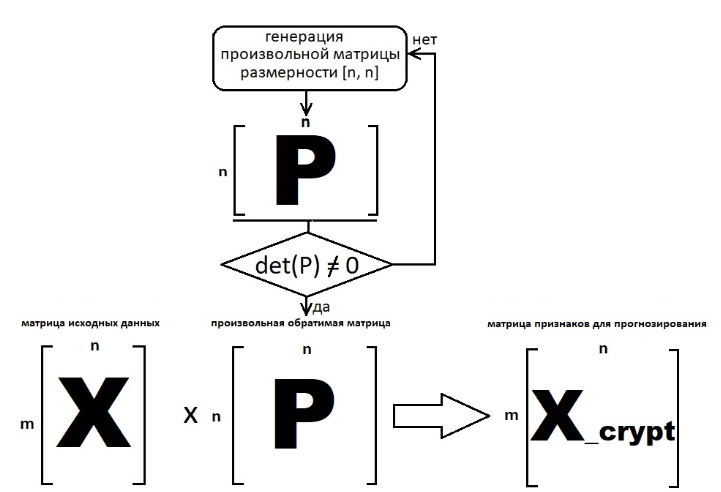

**Обоснование предложенного алгоритма**

Основой для предказаний целевого признака (количества страховых выплат) является матрица признаков, содержащая личные данные клиентов. Использование и передача подобной инфорации в открытом некодированном виде может превести к негативным последствиям как для клиента, так и для самой страховой компании. Шифрование личных данных поредством перемножения матрицы с личными данными на произвольную обратимую матрицу признаков (с учетом размерности матрицы) при каждом случае необходимости её использования не окажет влияние на конечный результат процесса (собственно предсказание количества страховых выплат), но, в случае утечки личных данных в зашифрованном виде, они будут дополнительно защищены, так как их восстановление из произведения матриц диктует необходимость наличия ключа - конкертную произвольно сгенерированную на данном этапе обратимую матрицу. Вероятно, получение такой матрицы является сложным и трудозатратным процессом.

## Проверка алгоритма

### Подготовка данных для обучения модели и предсказаний

Подготовим данные для обучения модели и предсказаний, выделим из таблицы признаки и целевые признаки.

In [9]:
df_features= df.drop('Страховые выплаты', axis = 1)
df_target = df['Страховые выплаты']

Проведем проверку предложенного алгоритма. Обучим модель линейной регрессии на исходных данных. Определеим среднее заначение метрики качествa (R2) прогноза посредством кроссвалидации до преобразования признаков и после преобразования согласно предложенному алгоритму.

In [10]:
model = LinearRegression() # обучение модели
model.fit(df_features, df_target)

LinearRegression()

Проведем проверку предложенного алгоритма. Обучим модель линейной регрессии на исходных данных. Определим среднее значение метрики качествa (R2) прогноза посредством кроссвалидации до преобразования признаков и после преобразования согласно предложенному алгоритму.

### Определение среднего значения метрики качества прогноза до преобразования данных

In [11]:
r2_before_crypt = cross_val_score(model, df_features, df_target,  cv=5).mean()
r2_before_crypt

0.4231137692077539

### Определение среднего значения метрики качества прогноза после преобразования данных

***Реализация алгоритма преобразования матрицы исходных признаков***

_Создание произвольной обратимой матрицы заданной размерности._

Создадим случайную матрицу заданной размерности по закону нормального распределения, вероятность того, что такая матица будет необратимой близка к нулю.

In [12]:
# цикл подбора обратимой матрицы заданной размерности с учетом проверки условия обратимости (неравенство дискриминанта нулю)

for i in range (100): 
    p = np.random.normal(size = (df_features.shape[1], df_features.shape[1]))
    if np.linalg.det(p) != 0: 
        break
p.shape

(4, 4)

In [13]:
p #кодирующая матрица

array([[ 1.28204533,  1.55176845, -0.8243064 , -1.09098219],
       [-1.35319792,  0.52012349,  0.99683441,  0.29450357],
       [ 0.69981519,  0.96392318, -0.0336865 ,  0.362021  ],
       [ 0.40723574, -0.46846173,  0.39928108,  0.81204763]])

_Получение зашифрованной матрицы признаков._

In [14]:
x_crypt = df_features.dot(p)
x_crypt.shape

(5000, 4)

In [15]:
x_crypt.info() #информация о зашифрованной матрице с личными данными

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
0    5000 non-null float64
1    5000 non-null float64
2    5000 non-null float64
3    5000 non-null float64
dtypes: float64(4)
memory usage: 156.4 KB


In [16]:
x_crypt.head() #пример отображения зашифрованной матрицы

,0,1,2,3
0,34657.041721,47832.998085,-1630.405321,17968.037292
1,26531.137452,36652.538049,-1233.833417,13771.157196
2,14656.876306,20257.470356,-678.508347,7610.981595
3,29154.690848,40205.582265,-1382.995054,15104.084353
4,18228.569031,25174.510218,-852.130649,9455.903207


Содержание полученной матрицы никоим образом не соответсвует исходнымм данным, содержащимся в матрице с личными данными клиентов - данные зашифрованы.

In [17]:
r2_after_crypt = cross_val_score(model, x_crypt, df_target,  cv=5).mean()
r2_after_crypt

0.4231137692077773

### Определение разницы в средних метриках (R2) прогнозов до и после преобразования матрицы признаков

In [18]:
dif_r2 = r2_before_crypt - r2_after_crypt 
dif_r2

-2.3425705819590803e-14

Как видно из полученных данных, разница в среднем значении метрики R2 прогноза между данными до и после преобразования черезвычайно мала и может быть интерпритирована как погрешность вычислений. Следовательно факт того, что умножение матрицы признаков на обратимую матрицу не влияет на качество прогноза модели, можно считать доказанным. 

### Вывод

Предложенный алгоритм преобразования исходной матрицы признаков последством произвольной обратимой матрицы заданной размерности доказал свою работоспоспособность, качество прогноза при преобразовании данных не меняется. 

## Общий вывод

Исходные данные: таблица, содержащая личную информацию клиентов страховой компании (пол, возраст, заработная плата, количество членов семьи, количество страховых выплат за последние 5 лет). Данные используются для получения прогноза о предполагаемом количестве выплат клиентам компании.

Поставленная задача: разработать метод преобразования данных, позволяющий защитить персональную информацию таким образом, чтобы не удшилось качество прогноза.

В ходе реализации проекта за базовый способ защиты информации был выбран метод умножения матрицы признаков, содержащую личную информацию, на произвольную обратимую матрицу.

В ходе теоретического анализа было доказано утверждение, что качество предсказаний линейной регрессии при умножении матрицы признаков на обратимую матрицу не изменяется.

Предложен алгоритм преобразования данных, который заключается в следующем: предоставляемая таблица признаков  𝑋 , содержащая личные данные клиентов, размерностью  [𝑛,𝑚]  перемножается на случайно сгенерированную обратимую матрицу  𝑃  размерностью  [𝑛,𝑛]  при каждом новом возникновении случая необходимости использовать лчиные данные для получения прогноза. Полученная закодированная матрица личных данных  𝑋𝑐𝑟𝑦𝑝𝑡 (личные данные в исходном виде отсутсвуют) может быть использована в дальнейшем процессе получения прогнозных данных.

Предложенный алгоритм был реализован и проверен на исходных данных путем сравнения среднего значения метрик R2 прогнозов на данных до и после преобразования - качество прогноза не меняется, преобразованная матрица признаков не содержит личных данных в исходном виде. Алгоритм работоспособен.